### 데이콘 Basic 자동차 가격 예측 AI 경진대회

- https://dacon.io/competitions/official/236114/overview/description

-  2023.06.12 ~ 2023.06.26 10:00

- 자동차 가격을 예측하는 AI 알고리즘 개발

  - 자동차 생산년도, 브랜드, 종류 등 자동차와 관련된 데이터를 활용하여 자동차 가격을 예측하는 AI 모델을 개발


#### 라이브러리 정의

In [1]:
import pandas as pd
import random
random.seed(30)
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
#한글 폰트 사용을 위해
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

#### 데이터 불러오기

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

display(train.head(), test.head())

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55


,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG)
0,TEST_00000,2017,2013,mazda,3,KAL,WIE,57000,1998,0,0,1,0,0
1,TEST_00001,2011,2008,ford,fiesta,ROP,POD,159000,1242,0,0,1,0,0
2,TEST_00002,2019,2017,volkswagen,polo,LOD,LOD,11284,999,0,0,1,0,0
3,TEST_00003,2021,2016,renault,megane,JAW,SLA,9,1332,0,0,1,0,0
4,TEST_00004,2010,2011,volvo,v60,WEJ,POM,270000,1999,0,0,1,0,0


#### 기본 정보 확인

In [3]:
display(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 14 columns):
 #   C

None

None

In [4]:
display(train.isna().sum(), test.isna().sum())

ID             0
생산년도           0
모델출시년도         0
브랜드            0
차량모델명          0
판매도시           0
판매구역           0
주행거리           0
배기량            0
압축천연가스(CNG)    0
경유             0
가솔린            0
하이브리드          0
액화석유가스(LPG)    0
가격             0
dtype: int64

ID             0
생산년도           0
모델출시년도         0
브랜드            0
차량모델명          0
판매도시           0
판매구역           0
주행거리           0
배기량            0
압축천연가스(CNG)    0
경유             0
가솔린            0
하이브리드          0
액화석유가스(LPG)    0
dtype: int64

In [5]:
train.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.000000,57920.000000,5.792000e+04,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000
mean,2011.355352,2008.033408,1.678691e+05,1788.160135,0.000483,0.425242,0.517956,0.010290,0.046029,52.211752
std,5.174108,5.087963,8.319120e+04,545.413818,0.021982,0.494384,0.499682,0.100918,0.209550,35.399718
min,1978.000000,1983.000000,1.000000e+00,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
25%,2008.000000,2004.000000,1.114345e+05,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.570000
50%,2011.000000,2008.000000,1.710000e+05,1753.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.250000
75%,2016.000000,2012.000000,2.200000e+05,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,73.970000
max,2022.000000,2021.000000,2.500000e+06,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


In [6]:
train['브랜드'].value_counts()

opel             6651
ford             5819
volkswagen       5693
audi             5597
bmw              5262
renault          3853
toyota           3259
skoda            3130
mercedes-benz    2899
nissan           2129
kia              2034
hyundai          1855
seat             1628
mazda            1572
honda            1545
volvo            1352
fiat             1164
citroen          1129
peugeot           793
mitsubishi        556
Name: 브랜드, dtype: int64

In [7]:
train['차량모델명'].value_counts()

astra        2537
a4           2082
seria-3      1998
golf         1910
focus        1647
             ... 
omega          17
frontera       14
s3              7
gle-klasa       2
g-klasa         1
Name: 차량모델명, Length: 143, dtype: int64

In [8]:
train['판매도시'].value_counts()

WAR    3245
KRA    1241
WRO    1166
LOD    1141
POZ     987
       ... 
MVH       1
CIB       1
CED       1
FNQ       1
ZDZ       1
Name: 판매도시, Length: 3224, dtype: int64

In [9]:
train['판매구역'].value_counts()

MAZ    10846
SLA     7655
WIE     6910
MAL     4746
DOL     4603
LOD     3581
POM     3517
KUJ     2628
LUB     2598
ZAC     2078
POD     1849
SWI     1789
WAR     1569
LUU     1427
POL     1066
OPO     1041
MOR       17
Name: 판매구역, dtype: int64

In [10]:
train['판매구역'].nunique()
#라벨 인코딩 가능

17

In [11]:
display(train['압축천연가스(CNG)'].value_counts(),
        train['경유'].value_counts(),
        train['가솔린'].value_counts(),
        train['하이브리드'].value_counts(),
        train['액화석유가스(LPG)'].value_counts())

0    57892
1       28
Name: 압축천연가스(CNG), dtype: int64

0    33290
1    24630
Name: 경유, dtype: int64

1    30000
0    27920
Name: 가솔린, dtype: int64

0    57324
1      596
Name: 하이브리드, dtype: int64

0    55254
1     2666
Name: 액화석유가스(LPG), dtype: int64

#### 간단 EDA

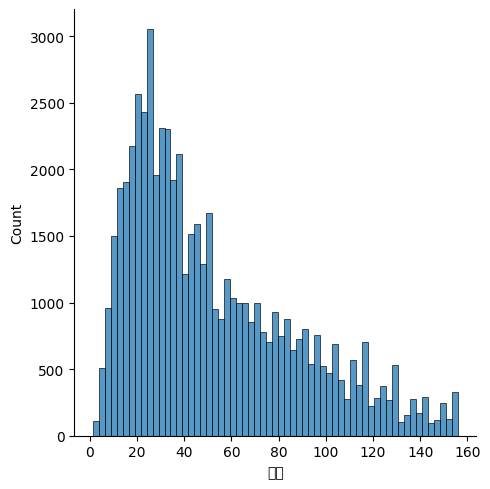

In [12]:
#타겟값인 가격 칼럼 시각화
sns.displot(train['가격'])
plt.show()

<Axes: >

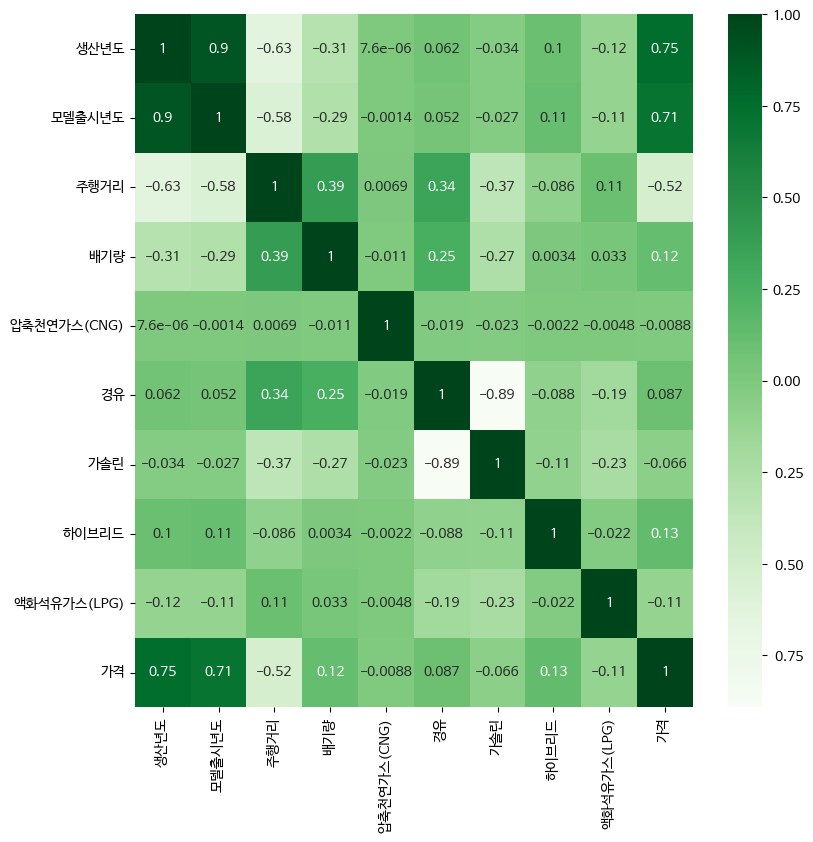

In [13]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(9,9))
sns.heatmap(data=train.corr(), annot=True, cmap='Greens')

타겟값인 '가격'과 상관성이 높은 피처는 '생산년도'랑 '모델출시년도'

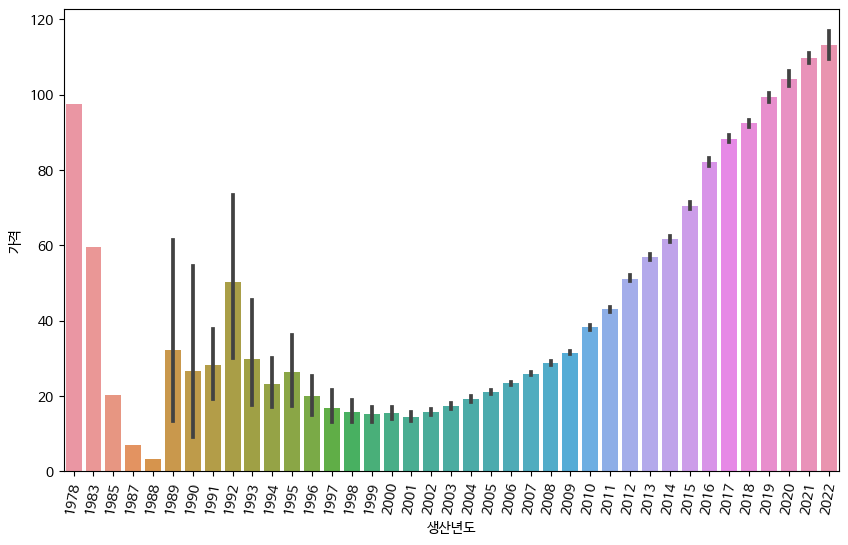

In [14]:
#생산년도별 평균 가격 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=train, x='생산년도', y='가격')
plt.xticks(rotation=80)
plt.show()

대체로 생산년도가 최근일수록 가격이 비쌈

그러나 과거임에도 가격이 높거나 눈에 띄게 평균 가격이 낮은 1978년도, 1983년도, 1987년도, 1988년도 데이터는 좀 더 살펴보기

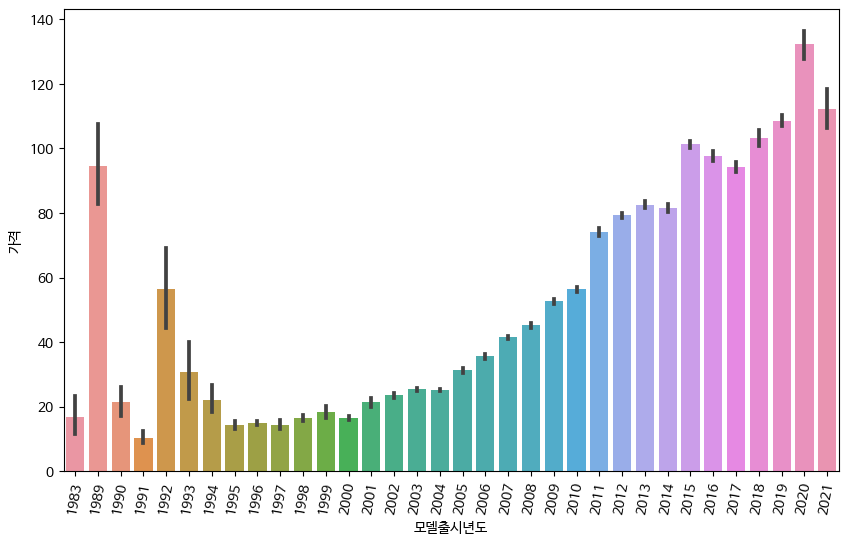

In [15]:
#모델출시년도별 평균 가격 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=train, x='모델출시년도', y='가격')
plt.xticks(rotation=80)
plt.show()

대체로 출시년도가 최근일수록 가격이 높음

그러나, 과거임에도 가격이 높거나 평균 가격이 매우 낮게 나오는 1989년도, 1991년도, 1992년도 데이터는 좀 더 살펴보기

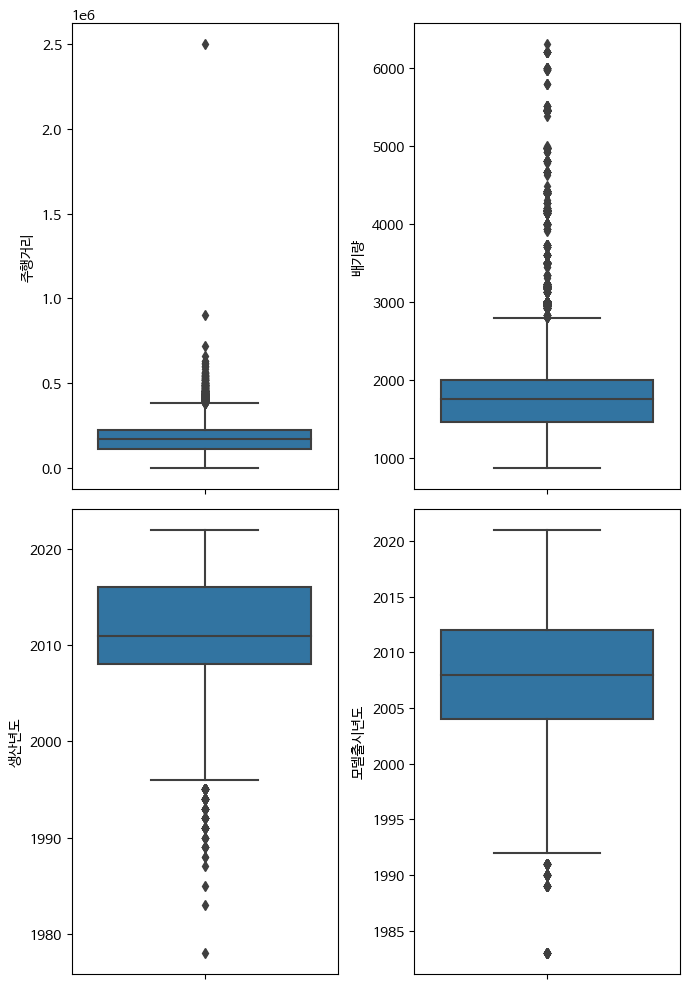

In [16]:
#이상치 확인
fig, axes = plt.subplots(2,2, figsize = (7,10))

sns.boxplot(y = train['주행거리'], ax = axes[0][0])
sns.boxplot(y = train['배기량'], ax = axes[0][1])

sns.boxplot(y = train['생산년도'], ax = axes[1][0])
sns.boxplot(y = train['모델출시년도'], ax = axes[1][1])

plt.tight_layout()
plt.show()

#### AutoGluon 활용해보자

  <참고 자료>

- https://auto.gluon.ai/stable/index.html

- https://dacon.io/competitions/official/236114/codeshare/8456?page=1&dtype=recent

- https://dacon.io/codeshare/7764

- https://dacon.io/competitions/official/236114/codeshare/8454?page=1&dtype=recent

- https://sarah0518.tistory.com/89

- AutoGluon은 다양한 알고리즘으로, customized parameter 범위 내에서 최적의 알고리즘을 select해주는 기법이다

- 각 알고리즘별 tuning parameter들을 세팅할 수 있는데, 하이퍼 파라미터에 대한 customize는 GBM, NN, RF, CAT에서만 가능하다

In [17]:
!pip install autogluon

In [18]:
#TabularData(정형데이터)를 다루기 때문에 아래 라이브러리 호출
from autogluon.tabular import TabularDataset, TabularPredictor
import autogluon.core as ag

##### 학습하기

- autogluon 내부에는 여러가지 모델을 알아서 비교해주고 코드로 구현하기 쉬움

In [19]:
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

In [20]:
#autogluon 학습을 위한 데이터 형태로 변환
train = TabularDataset(train)
test = TabularDataset(test)

In [21]:
predictor = TabularPredictor(label='가격',
                             problem_type='regression',
                             eval_metric='mae').fit(train)

No path specified. Models will be saved in: "AutogluonModels/ag-20230703_041124/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230703_041124/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Disk Space Avail:   82.05 GB / 115.66 GB (70.9%)
Train Data Rows:    57920
Train Data Columns: 13
Label Column: 가격
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12128.82 MB
	Train Data (Original)  Memory Usage: 18.35 MB (0.2% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generator

[1000]	valid_set's l1: 5.90157
[2000]	valid_set's l1: 5.84195


	-5.8317	 = Validation score   (-mean_absolute_error)
	26.23s	 = Training   runtime
	1.05s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's l1: 5.84017


	-5.8322	 = Validation score   (-mean_absolute_error)
	7.02s	 = Training   runtime
	0.41s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-6.0118	 = Validation score   (-mean_absolute_error)
	97.68s	 = Training   runtime
	0.78s	 = Validation runtime
Fitting model: CatBoost ...
	-5.8151	 = Validation score   (-mean_absolute_error)
	1128.54s	 = Training   runtime
	0.85s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-6.0009	 = Validation score   (-mean_absolute_error)
	41.0s	 = Training   runtime
	0.73s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-6.0808	 = Validation score   (-mean_absolute_error)
	138.01s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: XGBoost ...
	-5.9248	 = Validation score   (-mean_absolute_error)
	90.91s	 = Training   runtime
	0.95s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-6.369	 = Validation score   (-mean_absolute_error)
	124.29s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: L

[1000]	valid_set's l1: 5.65789


	-5.6526	 = Validation score   (-mean_absolute_error)
	14.77s	 = Training   runtime
	1.22s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-5.4953	 = Validation score   (-mean_absolute_error)
	0.78s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1703.68s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230703_041124/")


In [27]:
#predictor의 summary값 확인
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -5.495345       4.660031  1635.963700                0.001131           0.779660            2       True         12
1         LightGBMLarge  -5.652586       1.224401    14.770763                1.224401          14.770763            1       True         11
2              CatBoost  -5.815062       0.850227  1128.538806                0.850227        1128.538806            1       True          6
3            LightGBMXT  -5.831700       1.049686    26.232757                1.049686          26.232757            1       True          3
4              LightGBM  -5.832224       0.414197     7.016816                0.414197           7.016816            1       True          4
5               XGBoost  -5.924753       0.952236    90.906208                0.952236      

In [22]:
#위와 같은 정보를 리더보드로 확인
ld_board = predictor.leaderboard(train, silent=True)
ld_board

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-1.113688,-16.703670,0.709999,0.078764,0.180185,0.709999,0.078764,0.180185,1,True,2
1,RandomForestMSE,-2.750212,-6.011757,8.421520,0.775243,97.677653,8.421520,0.775243,97.677653,1,True,5
2,ExtraTreesMSE,-3.049630,-6.000862,9.992340,0.730689,40.998093,9.992340,0.730689,40.998093,1,True,7
3,LightGBMLarge,-3.466650,-5.652586,23.486255,1.224401,14.770763,23.486255,1.224401,14.770763,1,True,11
4,WeightedEnsemble_L2,-3.510822,-5.495345,87.940834,4.660031,1635.963700,0.013026,0.001131,0.779660,2,True,12
5,XGBoost,-3.931571,-5.924753,25.156268,0.952236,90.906208,25.156268,0.952236,90.906208,1,True,9
6,LightGBM,-4.395887,-5.832224,12.172485,0.414197,7.016816,12.172485,0.414197,7.016816,1,True,4
7,NeuralNetFastAI,-4.513795,-6.080845,2.335398,0.079530,138.006784,2.335398,0.079530,138.006784,1,True,8
8,LightGBMXT,-4.815487,-5.831700,31.435905,1.049686,26.232757,31.435905,1.049686,26.232757,1,True,3
9,CatBoost,-5.007776,-5.815062,18.176280,0.850227,1128.538806,18.176280,0.850227,1128.538806,1,True,6


##### 예측

In [29]:
#어떤 모델이 가장 성능이 좋았는지
model_to_use = predictor.get_model_best()
model_to_use

'WeightedEnsemble_L2'

In [23]:
#가장 성능 좋은 모델로 예측
predictor = TabularPredictor.load("AutogluonModels/ag-20230703_041124/")
pred = predictor.predict(test, model=model_to_use)

In [24]:
pred

0         92.595566
1         26.624863
2         87.392128
3        125.270287
4         46.227715
            ...    
14475     40.767590
14476     23.771589
14477    107.951439
14478     51.633385
14479     43.190853
Name: 가격, Length: 14480, dtype: float32

In [26]:
submission = pd.read_csv('/content/sample_submission.csv')
submission['가격'] = pred
submission.to_csv('AutoGluon_submit.csv', index=False)